# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [266]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
%matplotlib inline

import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

import warnings
warnings.filterwarnings("ignore")

import time
import pickle

In [98]:
nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cyuancheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cyuancheng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cyuancheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [267]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('ResponseCategory', engine)

In [268]:
print(df.shape)
df.head()

(26216, 38)


,id,message,original,genre,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
X = df["message"] # features
y = df.drop(axis=1, labels=["id", "message", "original", "genre"]) # labels

y.columns

Index(['request', 'offer', 'aid_related', 'medical_help', 'medical_products',
       'search_and_rescue', 'security', 'military', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [102]:
y.isnull().sum()

request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake                0
cold                      0
other_weather             0
direct_report             0
dtype: int64

### 2. Write a tokenization function to process your text data

In [103]:
def tokenize(text):
    '''
    process text data 
    tokenization, lemmatization, remove stopwords
    '''
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    tokens = word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()
    clean_tokens = []
    
    for token in tokens:
        clean_tok = lemmatizer.lemmatize(token).lower().strip()
        
        # remove stop words 
        if clean_tok not in set(stopwords.words("english")):
            clean_tokens.append(clean_tok)
        
    return clean_tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [200]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(RandomForestClassifier(random_state=42)))
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipeline.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...           oob_score=False, random_state=42, verbose=0, warm_start=False),
           n_jobs=None))])

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

**Random Forest**

In [203]:
y_pred = pipeline.predict(X_test)

In [204]:
def metrics(y, y_pred):
    name = [];
    precision=[];
    recall=[];
    fscore=[];
    accuracy=[];
    for i in range(y.shape[1]):
        name.append(y.columns.tolist()[i])
        precision.append(precision_recall_fscore_support(np.array(y_test)[:, i], np.array(y_pred)[:, i], average='weighted')[0])
        recall.append(precision_recall_fscore_support(np.array(y_test)[:, i], np.array(y_pred)[:, i], average='weighted')[1])
        fscore.append(precision_recall_fscore_support(np.array(y_test)[:, i], np.array(y_pred)[:, i], average='weighted')[2])
        accuracy.append(accuracy_score(np.array(y_test)[:, i], np.array(y_pred)[:, i]))
    
    metrics_df = pd.DataFrame(data = {'Precision':precision,'Recall':recall,'F1-Score':fscore, 'Accuracy':accuracy}, index = name)#, index = name)#, columns = ['Precision', 'Recall', 'F1','accuracy'])
    return metrics_df

In [208]:
metrics_df = metrics(y_test, y_pred)
print("F1 score mean : ", metrics_df['F1-Score'].mean())
metrics_df

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 score mean :  0.9356986948973044


,Precision,Recall,F1-Score,Accuracy
request,0.877223,0.885261,0.871652,0.885261
offer,0.989955,0.994965,0.992454,0.994965
aid_related,0.744541,0.746872,0.743091,0.746872
medical_help,0.908556,0.924626,0.901545,0.924626
medical_products,0.941663,0.950717,0.931911,0.950717
search_and_rescue,0.958268,0.975435,0.963902,0.975435
security,0.964902,0.981538,0.973149,0.981538
military,0.961573,0.970400,0.958497,0.970400
water,0.938100,0.946140,0.931786,0.946140
food,0.931653,0.935917,0.929729,0.935917


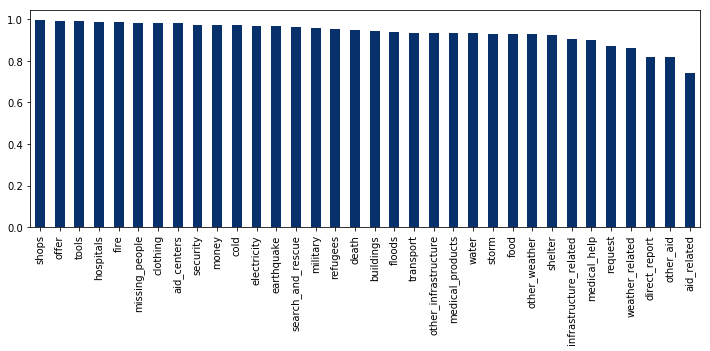

In [206]:
plt.figure(figsize=[12,4])
metrics_df['F1-Score'].sort_values(ascending=False).plot("bar", colormap="Blues_r")

### 6. Improve your model
Use grid search to find better parameters. 

In [209]:
# read current parameters:
print(pipeline.get_params())

{'memory': None, 'steps': [('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x1a23b50620>, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('clf', MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          

In [221]:
parameters = {
        'vect__ngram_range': ((1, 1), (1, 2)),
       # 'vect__max_df': (0.5, 1.0),
        #'vect__max_features': (None, 5000),
       # 'tfidf__use_idf': (True, False),
        #'clf__estimator__max_features': ['auto', 'sqrt'],
        'clf__estimator__n_estimators': [50, 100, 200],
        'clf__estimator__min_samples_split': [2, 4]
    }

cv = GridSearchCV(pipeline, param_grid=parameters, verbose=3, n_jobs=-1)

In [222]:
time_begin = time.time()
tuned_model = cv.fit(X_train, y_train)
print(time.time() - time_begin)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 222.5min
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 348.8min finished


26310.948766946793


In [223]:
tuned_model.best_params_

{'clf__estimator__min_samples_split': 2,
 'clf__estimator__n_estimators': 200,
 'vect__ngram_range': (1, 2)}

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [224]:
y_pred_tuned = tuned_model.predict(X_test)

In [225]:
metrics_df_tuned = metrics(y_test, y_pred_tuned)
print("F1 score mean : ", metrics_df_tuned['F1-Score'].mean())
metrics_df_tuned

F1 score mean :  0.9368888368055202


,Precision,Recall,F1-Score,Accuracy
request,0.890822,0.895941,0.884402,0.895941
offer,0.989955,0.994965,0.992454,0.994965
aid_related,0.773072,0.773879,0.769835,0.773879
medical_help,0.900635,0.920812,0.889999,0.920812
medical_products,0.948000,0.952243,0.934236,0.952243
search_and_rescue,0.972175,0.976808,0.967096,0.976808
security,0.969479,0.981996,0.973671,0.981996
military,0.965452,0.970400,0.957227,0.970400
water,0.954646,0.958193,0.951360,0.958193
food,0.934884,0.938511,0.932601,0.938511


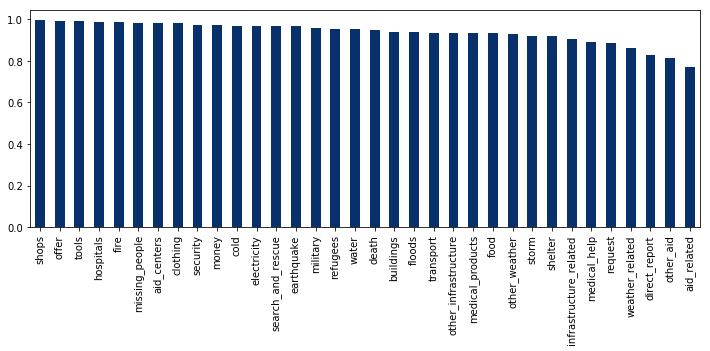

In [226]:
plt.figure(figsize=[12,4])
metrics_df_tuned['F1-Score'].sort_values(ascending=False).plot("bar", colormap="Blues_r")

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

**Logistic Regression**

In [233]:
# try Logistic Regression
pipeline_LR = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
                     ("tfidf",TfidfTransformer()),
                     ("clf", MultiOutputClassifier(LogisticRegression()))])

In [234]:
parameters = {
    "clf__estimator__C" : [0.1,1,10]
    }
cv = GridSearchCV(pipeline_LR, param_grid=parameters, n_jobs=-1, cv=3)

In [235]:
time_begin = time.time()
cv.fit(X_train, y_train)
print(time.time() - time_begin)

2059.384511947632


In [239]:
cv.best_params_

{'clf__estimator__C': 1}

In [236]:
y_pred_LR = cv.predict(X_test)

In [237]:
metrics_df_LR = metrics(y_test, y_pred_LR)
print("F1 score mean : ", metrics_df_LR['F1-Score'].mean())
metrics_df_LR

F1 score mean :  0.9406886920947872


,Precision,Recall,F1-Score,Accuracy
request,0.896422,0.901282,0.891817,0.901282
offer,0.989955,0.994965,0.992454,0.994965
aid_related,0.775255,0.776625,0.773585,0.776625
medical_help,0.905909,0.923711,0.900536,0.923711
medical_products,0.947123,0.954074,0.939818,0.954074
search_and_rescue,0.977346,0.976808,0.966326,0.976808
security,0.964915,0.982301,0.973530,0.982301
military,0.959587,0.970095,0.959014,0.970095
water,0.953865,0.958346,0.953352,0.958346
food,0.937867,0.941105,0.935788,0.941105


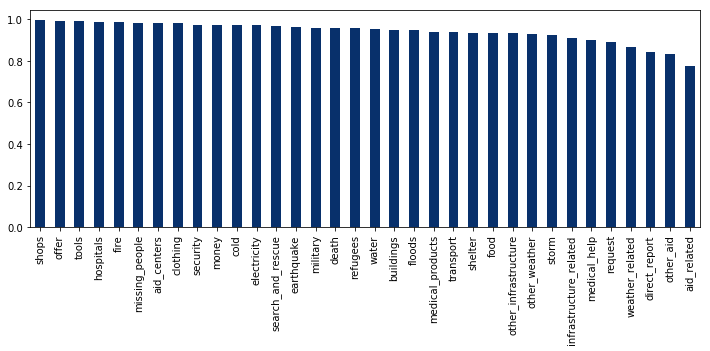

In [240]:
plt.figure(figsize=[12,4])
metrics_df_LR['F1-Score'].sort_values(ascending=False).plot("bar", colormap="Blues_r")

**AdaBoost**

In [ ]:
# Try AdaBoostClassifier Classifier
pipeline_AB = Pipeline([
    ('vect', CountVectorizer(tokenizer = tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(AdaBoostClassifier()))
])

parameters_AB = {#'vect__min_df': [5],
              #'tfidf__use_idf':[True],
              'clf__estimator__learning_rate': [0.001, 0.01, 0.1]
              }
cv_AB = GridSearchCV(pipeline_AB, param_grid = parameters_AB, verbose = 3)

In [251]:
model_AB = cv_AB.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] clf__estimator__learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__estimator__learning_rate=0.001, score=0.38175160207506864, total= 5.7min
[CV] clf__estimator__learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.9min remaining:    0.0s


[CV]  clf__estimator__learning_rate=0.001, score=0.38602380225816296, total= 4.9min
[CV] clf__estimator__learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.7min remaining:    0.0s


[CV]  clf__estimator__learning_rate=0.001, score=0.38861763808361305, total= 6.7min
[CV] clf__estimator__learning_rate=0.01 ..............................
[CV]  clf__estimator__learning_rate=0.01, score=0.40707964601769914, total= 6.2min
[CV] clf__estimator__learning_rate=0.01 ..............................
[CV]  clf__estimator__learning_rate=0.01, score=0.4116570033567287, total= 3.9min
[CV] clf__estimator__learning_rate=0.01 ..............................
[CV]  clf__estimator__learning_rate=0.01, score=0.41196216051266404, total= 4.0min
[CV] clf__estimator__learning_rate=0.1 ...............................
[CV]  clf__estimator__learning_rate=0.1, score=0.4267622825755264, total= 5.9min
[CV] clf__estimator__learning_rate=0.1 ...............................
[CV]  clf__estimator__learning_rate=0.1, score=0.4208117180347879, total= 5.9min
[CV] clf__estimator__learning_rate=0.1 ...............................
[CV]  clf__estimator__learning_rate=0.1, score=0.4290509612450412, total= 4.0min

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 70.1min finished


In [253]:
model_AB.best_params_

{'clf__estimator__learning_rate': 0.1}

In [254]:
y_pred_AB = model_AB.predict(X_test)

In [255]:
metrics_df_AB = metrics(y_test, y_pred_AB)
print("F1 score mean : ", metrics_df_AB['F1-Score'].mean())
metrics_df_AB

F1 score mean :  0.9292643309945742


,Precision,Recall,F1-Score,Accuracy
request,0.865418,0.867562,0.837205,0.867562
offer,0.989955,0.994965,0.992454,0.994965
aid_related,0.716196,0.707049,0.685675,0.707049
medical_help,0.898383,0.919896,0.886489,0.919896
medical_products,0.941395,0.948886,0.926124,0.948886
search_and_rescue,0.974793,0.976808,0.966589,0.976808
security,0.964915,0.982301,0.973530,0.982301
military,0.947659,0.969179,0.954607,0.969179
water,0.960922,0.963991,0.960922,0.963991
food,0.945143,0.947055,0.945822,0.947055


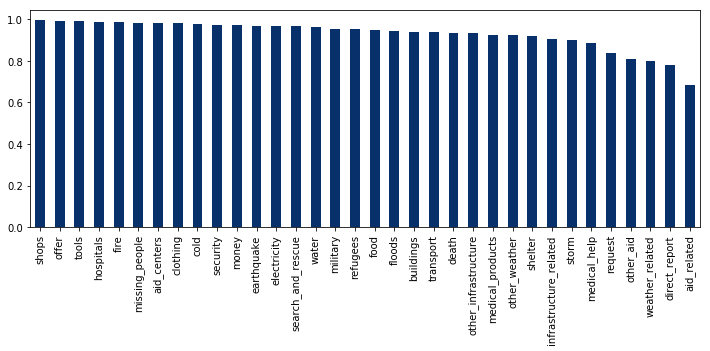

In [256]:
plt.figure(figsize=[12,4])
metrics_df_AB['F1-Score'].sort_values(ascending=False).plot("bar", colormap="Blues_r")

**The best model so far is logistic regression**

In [259]:
# try Logistic Regression
pipeline_LR_tuned = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
                     ("tfidf",TfidfTransformer()),
                     ("clf", MultiOutputClassifier(LogisticRegression(C=1)))])

In [ ]:
parameters = {
    "clf__estimator__C" : [0.1,1,10]
    }
cv = GridSearchCV(pipeline_LR, param_grid=parameters, n_jobs=-1, cv=3)

In [263]:
time_begin = time.time()
model_LR_tuned = pipeline_LR_tuned.fit(X_train, y_train)
print(time.time() - time_begin)

218.8107340335846


In [264]:
y_pred_LR_tuned = model_LR_tuned.predict(X_test)

In [265]:
metrics_df_LR = metrics(y_test, y_pred_LR_tuned)
print("F1 score mean : ", metrics_df_LR['F1-Score'].mean())
metrics_df_LR

F1 score mean :  0.9406886920947872


,Precision,Recall,F1-Score,Accuracy
request,0.896422,0.901282,0.891817,0.901282
offer,0.989955,0.994965,0.992454,0.994965
aid_related,0.775255,0.776625,0.773585,0.776625
medical_help,0.905909,0.923711,0.900536,0.923711
medical_products,0.947123,0.954074,0.939818,0.954074
search_and_rescue,0.977346,0.976808,0.966326,0.976808
security,0.964915,0.982301,0.973530,0.982301
military,0.959587,0.970095,0.959014,0.970095
water,0.953865,0.958346,0.953352,0.958346
food,0.937867,0.941105,0.935788,0.941105


### 9. Export your model as a pickle file

In [ ]:
pickle.dump(model_LR_tuned, open('disaster_model_LR.sav', 'wb'))

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.